In [1]:
from spkit import bkt
import pandas as pd
import re
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload

In [69]:
%autoreload 0

In [3]:
%aimport spkit.bkt

### Reading KDD train file
Drop rows with null in any of the important columns

In [91]:
%%time
df_all = pd.read_csv('algebra_2008_2009_master.txt', delimiter='\t')
print(df_all.shape)

(3967, 19)
CPU times: user 29 ms, sys: 7.92 ms, total: 36.9 ms
Wall time: 39.5 ms


In [148]:
df = df_all[['Row', 'Anon Student Id', 'Correct First Attempt', 'Problem Hierarchy', 'Problem Name', 'Problem View', 'Step Name', 'KC(Default)']]

In [162]:
df = df.dropna(subset=['KC(Default)'])
df = df.reset_index()

In [163]:
df.shape

(2954, 10)

In [154]:
idx_df = df[df["Row"] == int(1080617)].index.values.astype(int)[0]
idx_df

3966

,index,Row,Anon Student Id,Correct First Attempt,Problem Hierarchy,Problem Name,Problem View,Step Name,KC(Default)
0,0,390,0BrbPbwCMz,1,"Unit ES_04, Section ES_04-15",LIT59,1,b+r*(x+y) = v-s,"[SkillRule: Remove constant; {ax+b=c, positive..."
1,1,717,0BrbPbwCMz,1,"Unit CTA1_10, Section CTA1_10-5",DIST05_SP,1,R7C1,"Using small numbers~~Find X, positive slope~~U..."
2,2,803,0BrbPbwCMz,1,"Unit ES_07, Section ES_07-2",LIT50A,1,m*(k-n) = g*s,"[SkillRule: Remove coefficient; {ax+b=c, divid..."
3,3,881,19UbXBlPPK,1,"Unit CTA1_01, Section CTA1_01-2",BH1T17,1,R5C2,"Find Y, Simple~~Using simple numbers~~Using la..."
4,4,1190,2oNLCndtam,1,"Unit CTA1_12, Section CTA1_12-4",SYSFB23,1,R3C1,Define Variable
5,5,1547,2oNLCndtam,1,"Unit ES_05, Section ES_05-8",EG61,10,-9.91y-6.3 = -2.13,"[SkillRule: Remove constant; {ax+b=c, positive..."
6,6,2111,2oNLCndtam,1,"Unit CTA1_14, Section CTA1_14-4",2PTFB18,1,25X = 0,[SkillRule: Remove positive coefficient; {ax/b...
7,8,2697,2oNLCndtam,1,"Unit CTA1_15, Section CTA1_15-3",SYSFB10,1,60X = 3500,[SkillRule: Remove positive coefficient; {ax/b...
8,9,2982,2oNLCndtam,1,"Unit QUAD-ADD-AREA-ALG1, Section QUAD-ADD-AREA...",NEWSQUARE8TRE,1,R5C1,Entering a given~~Entering a given linear value
9,11,3742,2oNLCndtam,1,"Unit QUADRATICS-SOLVING_ES, Section QUADRATICS...",EG-S-FACTOR10,1,(9+sqrt(9^2-56))/2 = x,[SkillRule: Apply Exponent; {Expand Exponents;...


In [155]:
predicted_proba[idx_df]

IndexError: list index out of range

In [156]:
len(predicted_proba)

2954

In [152]:
df_all[df_all["Row"] == 1080617]

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
3966,1080617,IQQo3367x0,"Unit ES_02, Section ES_02-5",EG40,5,-2+5x+2 = 8+2,2006-03-09 10:59:18.0,2006-03-09 10:59:25.0,2006-03-09 10:59:25.0,2006-03-09 10:59:25.0,7.0,7.0,NaN,1,0,0,1,[SkillRule: Consolidate vars with coeff; CLT],7


### Preprocessing
Transform dataframe in a format understood by the BKT module

In [16]:
skipped = []
def get_kcs(row):
    text = row['KC(Default)'].replace(',','')
    kc_list = text.split('~~')
    kc = []
    for item in kc_list:
        # Option 1: with SkillRule prefix
        found_opt1 = re.findall(r'^\[SkillRule: ([\w ]+[ ,/?-]*[\w ]*);.*', item, flags=re.M)
        # Option 2: regular words (hyphenized or spaced)
        found_opt2 = re.findall(r'^([\w -]+).*', item, flags=re.M)
        # Option 3: get what couldn't be extracted from previous patterns
        found_opt3 = re.findall(r'^\[SkillRule: (.*);.*', item, flags=re.M)
        if found_opt1:
            kc.append(found_opt1[0])
        elif found_opt2:
            kc.append(found_opt2[0])
        elif found_opt3:
            kc.append(found_opt3[0])
        else:
            skipped.append(item)
    return kc

def get_steps(row):
    step = row['Problem Hierarchy'] + '_' + row["Problem Name"] + '_' + row['Step Name']
    return step

Separate KCs in a list and create an identifier name for the step

In [17]:
%%time
df['KC'] = df.apply(get_kcs, axis=1)
df['step'] = df.apply(get_steps, axis=1)

CPU times: user 385 ms, sys: 406 µs, total: 385 ms
Wall time: 385 ms


/home/lmoraes/miniconda3/envs/machineteaching/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/lmoraes/miniconda3/envs/machineteaching/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
%%time
kcs = []
for row in df['KC'].iteritems():
    kcs.extend(row[1])
kcs = list(set(kcs))
steps = df['step'].unique().tolist()

def create_data(row):
    question_id = steps.index(row['step'])
    return question_id

df['question_id'] = df.apply(create_data, axis=1)

CPU times: user 240 ms, sys: 638 µs, total: 240 ms
Wall time: 244 ms


/home/lmoraes/miniconda3/envs/machineteaching/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Construct Q-Matrix

In [44]:
with open('kdd_2005_2005_kcs.pkl', 'rb') as pklfile:
    kcs_train = pickle.load(pklfile)

In [46]:
%%time
q_matrix = np.zeros((len(steps), len(kcs_train)))

for idx, item in df.iterrows():
    for kc in item['KC']:
        kc_col = kcs_train.index(kc)
        q_matrix[item['question_id'], kc_col] = 1
    
print(q_matrix.shape)

(2391, 110)
CPU times: user 345 ms, sys: 3.89 ms, total: 349 ms
Wall time: 348 ms


Save data

In [47]:
import pickle
with open('kdd_test_2005_2005_df.pkl', 'wb') as pklfile:
    pickle.dump(df, pklfile)
with open('kdd_test_2005_2005_q_matrix.pkl', 'wb') as pklfile:
    pickle.dump(q_matrix, pklfile)

### Predicting data

In [49]:
%%time
# Load module
with open('kdd_2005_2005_model.pkl', 'rb') as pklfile:
    model = pickle.load(pklfile)
# Load learning states
with open('kdd_2005_2005_learning_state.pkl', 'rb') as pklfile:
    learning_state = pickle.load(pklfile)

# Data matrix
data = df[['Correct First Attempt', 'Anon Student Id', 'question_id']].values.tolist()

CPU times: user 9.5 ms, sys: 138 µs, total: 9.64 ms
Wall time: 10.7 ms


In [52]:
students = df['Anon Student Id'].unique().tolist()
len(students)

551

In [27]:
with open('kdd_test_2005_2005_students.pkl', 'wb') as pklfile:
    pickle.dump(students, pklfile)

In [57]:
%%time
data_arr = np.asarray(data)
rmse = 0
n = 0
score_df = []
outcome_all = []
predicted_proba = []
for student in students:
    student_idx = np.where(data_arr[:,1] == student)
    outcome = data_arr[student_idx, 0].astype('int64')
    outcome_all += outcome.tolist()[0]
    question_id = data_arr[student_idx, 2].astype('int64')
    data_student = np.vstack((outcome, question_id)).T.astype('int64').tolist()
    
    # Already seen the student, get last learning state
    if student in learning_state.keys():
        predicted = model.predict_proba(data_student, q_matrix, learning_state[student])
    # New student, use default learning state
    else:
        predicted = model.predict_proba(data_student, q_matrix)
    
    # Predict student probability of getting incorrect and correct outcome
    predicted_proba += predicted[:,1].tolist()
    # Calculate model score for given student
    ll_aic, s_aic, s_bic, s_rmse, s_acc = model.score()
    fpr, tpr, _ = roc_curve(outcome.flatten(), predicted[:,1], pos_label=1)
    auc_score = auc(fpr, tpr)
    
    # Save score data
    score_df.append({"student": student,
                     "AIC": s_aic,
                     "BIC": s_bic,
                     "RMSE": s_rmse,
                     "Acc": s_acc,
                     "n questions": model.n_questions,
                     "LL": ll_aic,
                     "correct_outcome": np.where(outcome == 1)[1].shape[0],
                     "incorrect_outcome": np.where(outcome == 0)[1].shape[0],
                     "AUC": auc_score})

CPU times: user 592 ms, sys: 175 µs, total: 592 ms
Wall time: 591 ms


In [58]:
score = pd.DataFrame.from_dict(score_df)

In [59]:
with open('kdd_test_2005_2005_score.pkl', 'wb') as pklfile:
    pickle.dump(score, pklfile)

In [60]:
rmse_train = np.sqrt((score['RMSE']**2*score['n questions']).sum()/score['n questions'].sum())
rmse_avg = score['RMSE'].mean()
rmse_std = score['RMSE'].std()

In [61]:
print("RMSE de teste: %.2f" % rmse_train)
print("RMSE médio: %.2f +- %.2f" % (rmse_avg, rmse_std))

RMSE de treino: 0.38
RMSE médio: 0.35 +- 0.15


In [62]:
acc_train = (score['Acc']*score['n questions']).sum()/score['n questions'].sum()
acc_avg = score['Acc'].mean()
acc_std = score['Acc'].std()

In [63]:
print("Acc de teste: %.2f" % acc_train)
print("Acc médio: %.2f +- %.2f" % (acc_avg, acc_std))

Acc de treino: 0.80
Acc médio: 0.79 +- 0.26


In [64]:
fpr, tpr, thresholds = roc_curve(outcome_all, predicted_proba, pos_label=1)
auc_score = auc(fpr, tpr)
auc_avg = score['AUC'].mean()
auc_std = score['AUC'].std()

# Load Youden's threshold
with open('kdd_2005_2005_threshold.pkl', 'rb') as pklfile:
    J_opt_thresholds = pickle.load(pklfile)

In [65]:
print("AUC de teste: %.2f" % auc_score)
print("AUC médio: %.2f +- %.2f" % (auc_avg, auc_std))

AUC de treino: 0.73
AUC médio: 0.73 +- 0.31


Recalculating accuracy after adjusting cutoff point with Youden's Index

In [66]:
estimated_outcome = np.where(np.asarray(predicted_proba) > J_opt_thresholds, 1, 0)
acc = (estimated_outcome == np.asarray(outcome_all)).sum()/score['n questions'].sum()
acc

0.7329045362220717

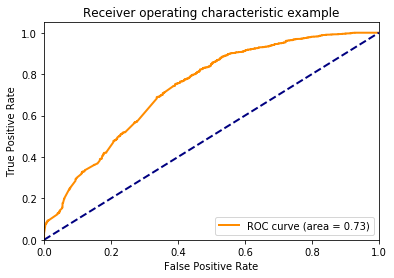

In [67]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Comparing accuracy to random baseline

In [68]:
n_questions = score['n questions'].sum()

# Save threshold
with open('kdd_2005_2005_threshold.pkl', 'rb') as pklfile:
    p = pickle.load(pklfile)
    
estimated_outcome = np.random.binomial(1, p, n_questions)
acc = (estimated_outcome == np.asarray(outcome_all)).sum()/score['n questions'].sum()
acc

0.6262694651320244

### Save to file

In [144]:
with open('algebra_2005_2006.txt', 'r') as test_file:
    rows = test_file.read().split('\n')
rows = rows[:-1]
len(rows)

3968

In [168]:
for idx, row in enumerate(rows):
    if idx == 0:
        outcome_prob = "%s\n" % row
    else:
        try:
            idx_df = df[df["Row"] == int(row)].index.values.astype(int)[0]
            outcome_prob += "%s%s\n" % (row, predicted_proba[idx_df])
        except (IndexError):
#             print(row)
#             random_outcome = np.random.normal(loc=p)
#             if random_outcome > 1:
#                 random_outcome = 1
#             elif random_outcome < 0:
#                 random_outcome = 0
            outcome_prob += "%s1.0\n" % (row)

# predicted_proba_str = ["%s%s" % (rows[idx+1], str(item)) for idx,item in enumerate(predicted_proba)]
# outcome_prob = "Row\tCorrect First Attempt\n"
# outcome_prob += "\n".join(predicted_proba_str)
with open('algebra_2005_2006_test_probabilities.txt', 'w') as results_file:
    results_file.write(outcome_prob)

In [41]:
score.sort_values(["AUC"], ascending=False)

,AIC,AUC,Acc,BIC,LL,RMSE,correct_outcome,incorrect_outcome,n questions,student
401,883.117911,1.0,0.666667,486.507318,-1.558955,0.426133,1,2,3,s9O034dIc4
455,883.226799,1.0,0.666667,486.616206,-1.613400,0.431620,1,2,3,Q0Fp6Da7G1
424,883.013192,1.0,0.500000,307.997951,-1.506596,0.528292,1,1,2,GVw1FC32GS
423,883.117792,1.0,0.500000,308.102552,-1.558896,0.538175,1,1,2,6e1627evYc
51,894.029828,1.0,0.375000,928.984106,-7.014914,0.580545,6,2,8,Fx8d98DRud
55,882.844233,1.0,0.500000,307.828993,-1.422117,0.514010,1,1,2,q9Pk62y29S
416,885.043989,1.0,0.333333,488.433396,-2.521994,0.567127,2,1,3,Vu26QoCms4
409,882.600925,1.0,0.500000,307.585684,-1.300462,0.499230,1,1,2,Ds3B2dRQo8
399,885.089568,1.0,0.333333,488.478975,-2.544784,0.576297,2,1,3,R398qG76GC
393,890.689634,1.0,0.200000,718.842316,-5.344817,0.638237,4,1,5,740FTSQ19O


In [42]:
score.sort_values(["Acc"], ascending=False)

,AIC,AUC,Acc,BIC,LL,RMSE,correct_outcome,incorrect_outcome,n questions,student
334,880.837810,NaN,1.000000,484.227217,-0.418905,0.176673,0,3,3,O46hm6g2nf
280,880.713350,NaN,1.000000,0.713350,-0.356675,0.300000,0,1,1,o0Q2M0X487
475,880.241010,NaN,1.000000,0.241010,-0.120505,0.113527,0,1,1,wz0V4oY4Z2
478,880.713350,NaN,1.000000,0.713350,-0.356675,0.300000,0,1,1,YoXjDl010q
454,881.426700,NaN,1.000000,306.411459,-0.713350,0.300000,0,2,2,m5MmtPWHdr
446,880.713350,NaN,1.000000,0.713350,-0.356675,0.300000,0,1,1,ctVOdq1wnp
58,880.713350,NaN,1.000000,0.713350,-0.356675,0.300000,0,1,1,jbw83hRJZQ
406,880.709847,NaN,1.000000,0.709847,-0.354923,0.298773,0,1,1,9iQ6dU8Ooj
396,881.426700,NaN,1.000000,306.411459,-0.713350,0.300000,0,2,2,l1L9ZwV1KO
394,880.713350,NaN,1.000000,0.713350,-0.356675,0.300000,0,1,1,b4WRCgbjkN
